In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
data_train = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/MachineLearning/master/dataset/Used%20Cars%20Price%20Prediction/traindata.csv")

In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [4]:
data_train.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [5]:
data_train.isnull().sum()

In [6]:
data_train['New_Price'].fillna(0, inplace = True)
data_train['New_Price'] = data_train['New_Price'].apply(lambda x : 1 if x != 0 else 0)

In [7]:
data_train['Mileage'].fillna(0, inplace = True)
data_train['Engine'].fillna(0, inplace = True)
data_train['Power'].fillna(0, inplace = True)
data_train['Seats'].fillna(0, inplace = True)

In [8]:
data_train.isnull().sum()

In [9]:
for i in range(data_train.shape[0]):
    data_train.at[i, 'Company'] = data_train['Name'][i].split()[0].upper()
    data_train.at[i, 'Mileage(km/kg)'] = str(data_train['Mileage'][i]).split()[0].upper()
    data_train.at[i, 'Engine(CC)'] = str(data_train['Engine'][i]).split()[0].upper()
    data_train.at[i, 'Power(bhp)'] = str(data_train['Power'][i]).split()[0].upper()
data_train['Power(bhp)'] = data_train['Power(bhp)'].apply(lambda x: 0 if x =='NULL' else x)
data_train['Mileage(km/kg)'] = data_train['Mileage(km/kg)'].astype(float)
data_train['Engine(CC)'] = data_train['Engine(CC)'].astype(float)
data_train['Power(bhp)'] = data_train['Power(bhp)'].astype(float)
data_train['Mileage(km/kg)'].fillna(data_train['Mileage(km/kg)'].mean(), inplace = True)
data_train['Engine(CC)'].fillna(data_train['Engine(CC)'].mean(), inplace = True)
data_train['Power(bhp)'].fillna(data_train['Power(bhp)'].mean(), inplace = True)
data_train['Seats'].fillna(data_train['Seats'].mode(), inplace = True)
data_train[["Company","Mileage(km/kg)","Engine(CC)","Power(bhp)"]].head(5)

,Company,Mileage(km/kg),Engine(CC),Power(bhp)
0,MARUTI,26.60,998.0,58.16
1,HYUNDAI,19.67,1582.0,126.20
2,HONDA,18.20,1199.0,88.70
3,MARUTI,20.77,1248.0,88.76
4,AUDI,15.20,1968.0,140.80


In [10]:
data_train.drop(["Name"],axis=1,inplace=True)
data_train.drop(["Mileage"],axis=1,inplace=True)
data_train.drop(["Engine"],axis=1,inplace=True)
data_train.drop(["Power"],axis=1,inplace=True)
var = 'Location'
data_train[var].value_counts()

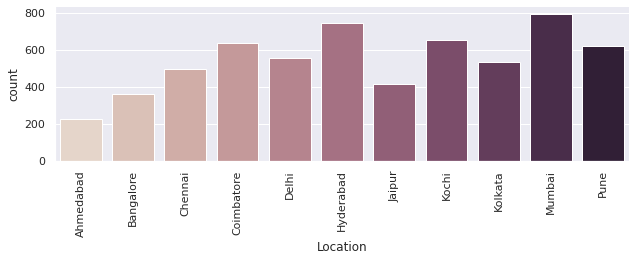

In [11]:
var = "Location"
plt.figure(figsize=(15, 5))
sns.catplot(x=var, kind="count", palette="ch:.15", height=3, aspect=3, data=data_train.sort_values('Location'));
plt.xticks(rotation=90);

In [12]:
var = "Year"
data_train[var].value_counts()

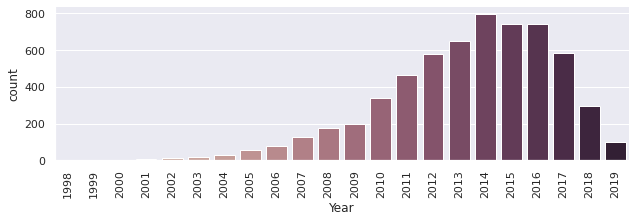

In [13]:
var = "Year"
plt.figure(figsize=(10, 5))
sns.catplot(x=var, kind="count", palette="ch:.20", height=3, aspect=3, data=data_train);
plt.xticks(rotation=90);

In [14]:
data_train['age'] = 2020 - data_train['Year']
data_train['age'] = data_train['age'].apply(lambda x: 15 if x >14 else x)
data_train = data_train.drop(['Year'],axis = 1)

In [15]:
var = 'Kilometers_Driven'
data_train[var].value_counts()

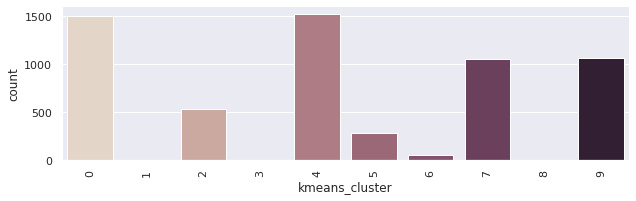

In [16]:
Kilometers_Driven_data = data_train[['Kilometers_Driven','Price']]
from sklearn.cluster import KMeans, AgglomerativeClustering
cluster = KMeans(n_clusters=10, random_state=0).fit(Kilometers_Driven_data)
Kilometers_Driven_data['kmeans_cluster'] = cluster.labels_
var = "kmeans_cluster"
plt.figure(figsize=(10, 5))
sns.catplot(x=var, kind="count", palette="ch:.20", height=3, aspect=3, data=Kilometers_Driven_data);
plt.xticks(rotation=90);

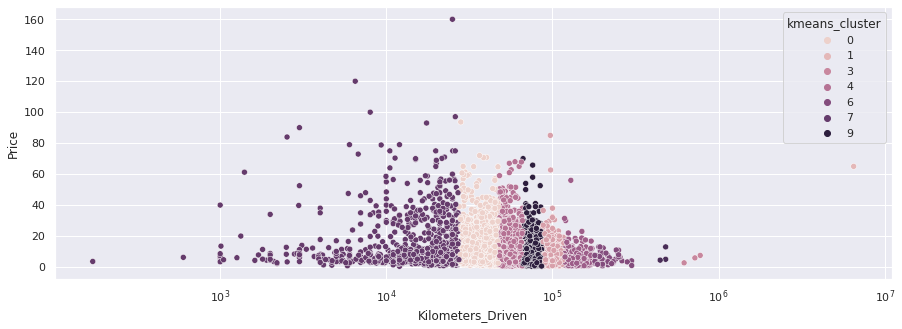

In [17]:
from matplotlib.pyplot import figure
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(15, 5))
ax.set( xscale="log")
sns.scatterplot(y=Kilometers_Driven_data['Price'], x=Kilometers_Driven_data['Kilometers_Driven'], hue=Kilometers_Driven_data['kmeans_cluster'])

In [18]:
data_train['Kilometers_Driven_rate'] = Kilometers_Driven_data['kmeans_cluster']
var = 'Fuel_Type'
data_train[var].value_counts()

In [19]:
data_train["Fuel_Type"].describe()

In [20]:
data_train['Fuel_Type'] = data_train['Fuel_Type'].apply(lambda x: "Clean_Fuel" if x not in ['Diesel', 'Petrol'] else x)

In [21]:
var = "Fuel_Type"
data_train[var].value_counts()

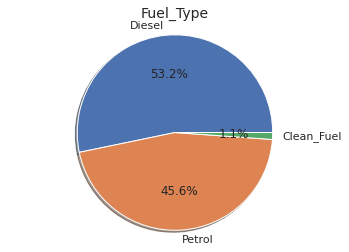

In [22]:
var = "Fuel_Type"
plt.figure(figsize=(10, 5))
labels = ['Diesel', 'Petrol',"Clean_Fuel"]
sizes = [data_train['Fuel_Type'].value_counts()[0],
         data_train['Fuel_Type'].value_counts()[1],
         data_train['Fuel_Type'].value_counts()[2],
        ]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.title(var, fontsize=14);
plt.show()

In [23]:
var = "Transmission"
data_train[var].value_counts()

In [24]:
data_train["Transmission"].describe()

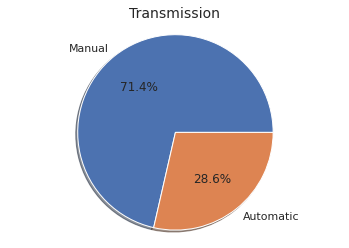

In [26]:
var = "Transmission"
plt.figure(figsize=(10, 5))
labels = ['Manual', 'Automatic']
sizes = [data_train['Transmission'].value_counts()[0],
         data_train['Transmission'].value_counts()[1],
        ]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.title(var, fontsize=14);
plt.show()

In [27]:
print('Mean of Auto - price: ',data_train[data_train['Transmission'] =='Automatic']['Price'].mean())
print('Mean of Manual - price: ',data_train[data_train['Transmission'] =='Manual']['Price'].mean())

Mean of Auto - price:  19.843970930232558
Mean of Manual - price:  5.33270295417539


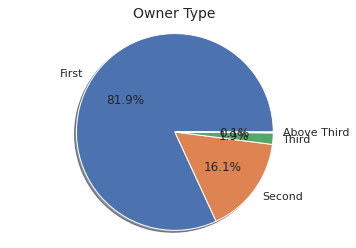

In [28]:
var = "Owner Type"
plt.figure(figsize=(10, 5))
labels = ['First', 'Second',"Third","Above Third"]
sizes = [data_train['Owner_Type'].value_counts()[0],
         data_train['Owner_Type'].value_counts()[1],
         data_train['Owner_Type'].value_counts()[2],
         data_train['Owner_Type'].value_counts()[3],
        ]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.title(var, fontsize=14);
plt.show()

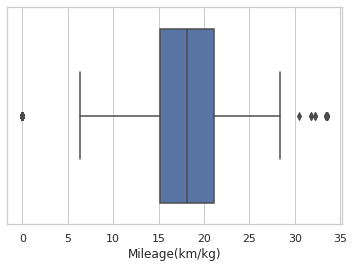

In [29]:
var = 'Mileage(km/kg)'
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=data_train[var])

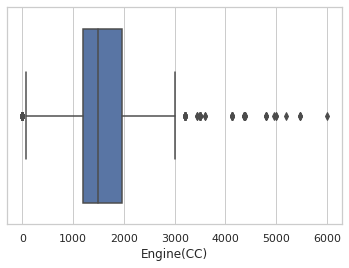

In [30]:
var = 'Engine(CC)'
data_train[var].value_counts()
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=data_train[var])

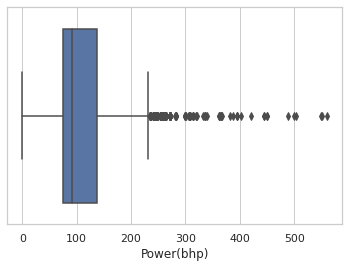

In [31]:
var = 'Power(bhp)'
data_train[var].value_counts()
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=data_train[var])

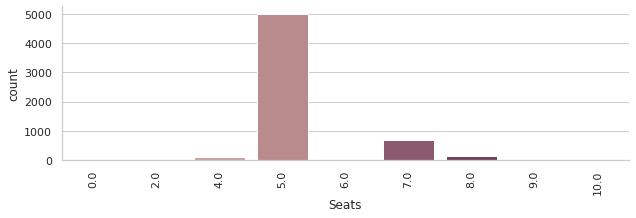

In [32]:
var = 'Seats'
plt.figure(figsize=(10, 5))
sns.catplot(x=var, kind="count", palette="ch:.20", height=3, aspect=3, data=data_train);
plt.xticks(rotation=90)

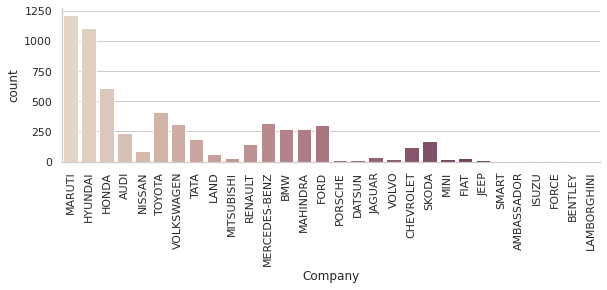

In [33]:
var = 'Company'
plt.figure(figsize=(10, 5))
sns.catplot(x=var, kind="count", palette="ch:.20", height=3, aspect=3, data=data_train);
plt.xticks(rotation=90);

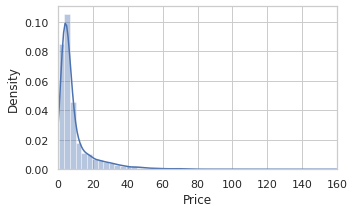

In [34]:
f, ax = plt.subplots(figsize=(5,3))

sns.distplot(data_train['Price'])
plt.xlim([0,160])

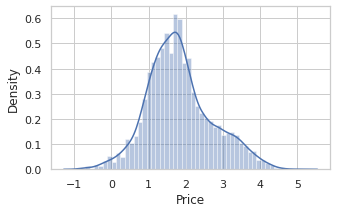

In [36]:
f, ax = plt.subplots(figsize=(5,3))
sns.distplot(np.log(data_train['Price']))

In [37]:
data_anova=ols('Price ~ Company + Location + Fuel_Type + Transmission + Owner_Type', data=data_train).fit()
print(sm.stats.anova_lm(data_anova, typ=2))

                     sum_sq      df           F        PR(>F)
Company       162652.750186    29.0  126.346005  0.000000e+00
Location       13307.034753    10.0   29.976394  5.478288e-57
Fuel_Type       6949.718082     2.0   78.277202  2.770277e-34
Transmission    9382.364174     1.0  211.353960  4.398869e-47
Owner_Type      7649.205771     3.0   57.437191  1.345989e-36
Residual      265151.697447  5973.0         NaN           NaN


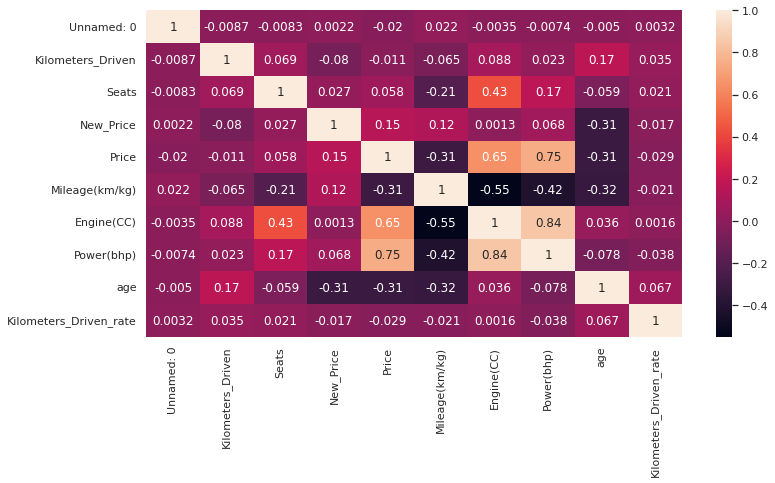

In [38]:
varlist = ['Location','age', 'Kilometers_Driven_rate','Fuel_Type','Transmission','Owner_Type','Seats','Company',
           'Mileage(km/kg)','Engine(CC)','Power(bhp)']
X = data_train[varlist].copy()
X.Transmission.replace({'Manual':0,'Automatic':1}, inplace=True)
X.Owner_Type.replace({'First':1,'Second':2,'Third':3,'Fourth & Above':4}, inplace=True)
from sklearn.preprocessing import OneHotEncoder
location_en = OneHotEncoder().fit(X[['Location']])
X_location = pd.DataFrame(location_en.transform(X[['Location']]).toarray(), columns=location_en.categories_)
fuel_en = OneHotEncoder().fit(X[['Fuel_Type']])
X_fuel = pd.DataFrame(fuel_en.transform(X[['Fuel_Type']]).toarray(), columns=fuel_en.categories_)
com_en = OneHotEncoder().fit(X[['Company']])
X_com = pd.DataFrame(com_en.transform(X[['Company']]).toarray(), columns=com_en.categories_)
X_final = pd.concat([X[['age', 'Kilometers_Driven_rate','Transmission','Owner_Type', 'Seats',
                        'Mileage(km/kg)', 'Engine(CC)','Power(bhp)']], X_location, X_fuel, X_com], axis=1)


for i in ['Mileage(km/kg)', 'Engine(CC)','Power(bhp)']:
    X_final[i] = pd.to_numeric(X_final[i], errors='coerce')

X_final.dropna(inplace=True)
corr = data_train.corr()
plt.subplots(figsize=(12,6))
sns.heatmap(corr, annot=True)

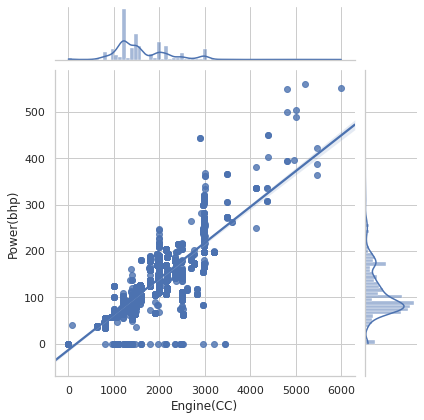

In [39]:
sns.jointplot(y = 'Power(bhp)',x = 'Engine(CC)',data = data_train,kind="reg", truncate=False)

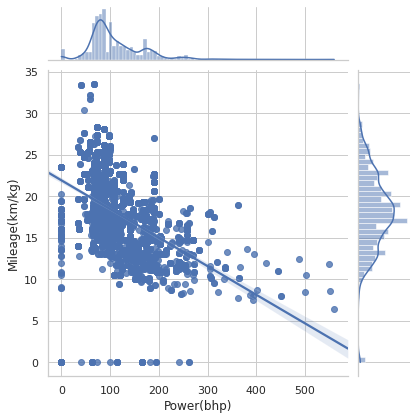

In [40]:
sns.jointplot(x = 'Power(bhp)',y = 'Mileage(km/kg)',data = data_train,kind="reg", truncate=False)

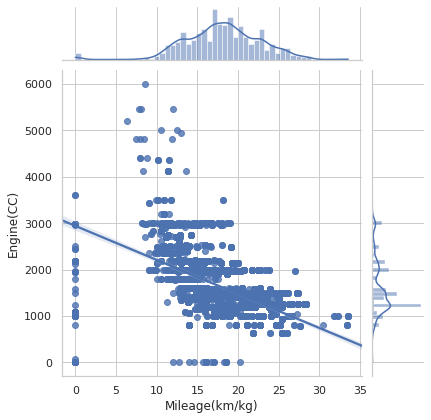

In [41]:
sns.jointplot(y = 'Engine(CC)',x = 'Mileage(km/kg)',data = data_train,kind="reg", truncate=False)

In [43]:
machine_data = X_final[['Engine(CC)','Power(bhp)','Mileage(km/kg)']]
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(machine_data)
machine_data = scalar.transform(machine_data)
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(machine_data)
x_pca = pca.transform(machine_data)
print(x_pca.shape)
print(sum(pca.explained_variance_ratio_))

(6019, 2)
0.9530948024661079


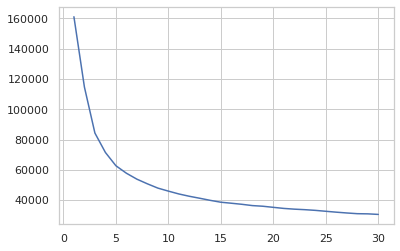

In [44]:
del X_final['Engine(CC)']
del X_final['Power(bhp)']
del X_final['Mileage(km/kg)']
X_final['PCA_1'] = x_pca[:,0]
X_final['PCA_2'] = x_pca[:,1]
from sklearn.cluster import KMeans, AgglomerativeClustering

distortions = []
for k in range(1, 31):
    cluster = KMeans(n_clusters=k, random_state=0).fit(X_final)
    distortions.append(cluster.inertia_)

import seaborn as sns
sns.lineplot(x=range(1,31), y=distortions)

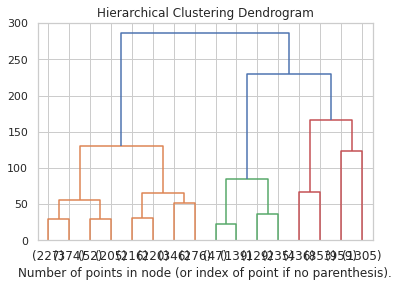

In [56]:
clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(X_final)
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    dendrogram(linkage_matrix, **kwargs)
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(clustering, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

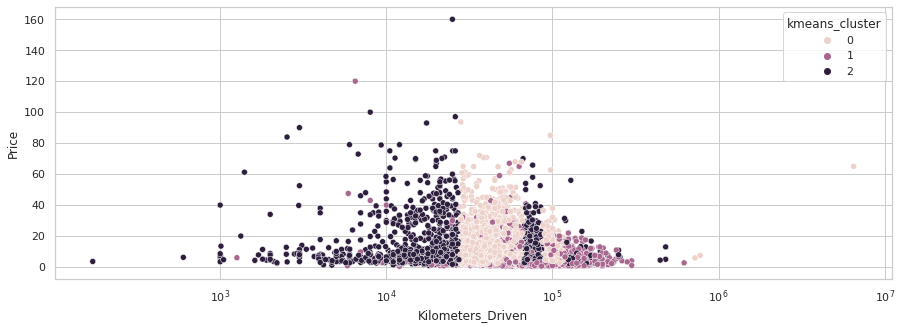

In [57]:
cluster = KMeans(n_clusters=3, random_state=0).fit(X_final)
X_final['kmeans_cluster'] = cluster.labels_
from matplotlib.pyplot import figure
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(15, 5))
ax.set( xscale="log")
sns.scatterplot(y=data_train['Price'], x=data_train['Kilometers_Driven'], hue=X_final['kmeans_cluster'])

In [58]:
X_final['Price'] = data_train.loc[data_train['Power(bhp)'] != 'null', 'Price']
import statsmodels.api as sm
from statsmodels.formula.api import ols

data_anova=ols('Price ~ kmeans_cluster', data=X_final).fit()
print(sm.stats.anova_lm(data_anova, typ=2))

                       sum_sq      df         F    PR(>F)
kmeans_cluster       1.464592     1.0  0.011699  0.913871
Residual        753268.522107  6017.0       NaN       NaN


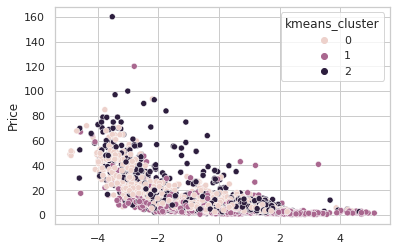

In [59]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_final_scaled = scalar.fit_transform(X_final[X_final.columns[:-2]])

from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_final_pca = pca.fit_transform(X_final_scaled)
sns.scatterplot(x=X_final_pca[:,0], y=data_train['Price'], hue=X_final['kmeans_cluster'])

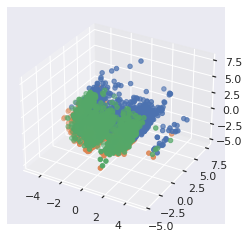

In [60]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components = 3)
X_final_pca3d = pca.fit_transform(X_final_scaled)

df = pd.DataFrame(X_final_pca3d, columns=['pca1','pca2','pca3'])
df['cluster'] = X_final['kmeans_cluster']

sns.set(style = "darkgrid")
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

for s in df.cluster.unique():
    ax.scatter(df.pca1[df.cluster==s],df.pca2[df.cluster==s],df.pca3[df.cluster==s],label=s)

plt.show()

In [61]:
data_final = X_final.drop(['kmeans_cluster'],axis = 1)
data_final = data_final.dropna()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_final_scaled = scaler.fit_transform(data_final)
X = data_final_scaled[:,0:-1]
y = data_final_scaled[:,-1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)
from sklearn.tree import DecisionTreeRegressor
log_reg = DecisionTreeRegressor()
from sklearn.metrics import mean_squared_error, r2_score
log_reg.fit(X_train, y_train)
y_pred= log_reg.predict(X_test)
print("R2 score on Traing set: %.2f"% log_reg.score(X_train,y_train))
print("R2 score on Testing set: %.2f"% log_reg.score(X_test,y_test))
print('Mean squared error: %.2f'% mean_squared_error(y_test,y_pred))

R2 score on Traing set: 1.00
R2 score on Testing set: 0.81
Mean squared error: 0.16


In [62]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
from sklearn.metrics import mean_squared_error, r2_score
rf_reg.fit(X_train, y_train)
y_pred= rf_reg.predict(X_test)
print("R2 score on Traing set: %.2f"% rf_reg.score(X_train,y_train))
print("R2 score on Testing set: %.2f"% rf_reg.score(X_test,y_test))
print('Mean squared error: %.2f'% mean_squared_error(y_test,y_pred))

R2 score on Traing set: 0.99
R2 score on Testing set: 0.89
Mean squared error: 0.10


In [63]:
X_final_2 = X_final.copy()
X_final_2['Price'] = np.log(X_final_2['Price'])
X_final_2.head()

,age,Kilometers_Driven_rate,Transmission,Owner_Type,Seats,"(Ahmedabad,)","(Bangalore,)","(Chennai,)","(Coimbatore,)","(Delhi,)",...,"(SKODA,)","(SMART,)","(TATA,)","(TOYOTA,)","(VOLKSWAGEN,)","(VOLVO,)",PCA_1,PCA_2,kmeans_cluster,Price
0,10,9,0,1,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-2.097579,-0.926591,1,0.559616
1,5,0,0,1,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.026307,-0.405866,0,2.525729
2,9,0,0,1,5.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.668469,0.318462,0,1.504077
3,8,2,0,1,7.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.890555,-0.180510,0,1.791759
4,7,0,1,2,5.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.004462,0.167557,0,2.875822


In [64]:
X_final_2_scaled = scaler.fit_transform(X_final_2)
X2 = X_final_2_scaled[:,0:-1]
y2 = X_final_2_scaled[:,-1]
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 25)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
linear_reg = LinearRegression()
linear_reg.fit(X2_train, y2_train.T)
y2_pred= linear_reg.predict(X2_test)

print("R2 score on Traing set: %.2f " % linear_reg.score(X2_train,y2_train))
print("R2 score on Testing set: %.2f" % linear_reg.score(X2_test,y2_test))
print('Mean squared error: %.2f'% mean_squared_error(y2_test,y2_pred))

R2 score on Traing set: 0.92 
R2 score on Testing set: 0.90
Mean squared error: 0.09


In [65]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X2_train, y2_train)
y2_pred= rf_reg.predict(X2_test)
print("R2 score on Traing set: %.2f"% rf_reg.score(X2_train,y2_train))
print("R2 score on Testing set: %.2f"% rf_reg.score(X2_test,y2_test))
print('Mean squared error: %.2f'% mean_squared_error(y2_test,y2_pred))

R2 score on Traing set: 0.99
R2 score on Testing set: 0.92
Mean squared error: 0.08
